<a href="https://colab.research.google.com/github/obeabi/Effective-Pandas-/blob/main/Chapter9_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print('\Dependencies installed successfully!')

\Dependencies installed successfully!


In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv( url , encoding='utf_8_sig')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


Question 1

Create a series from a numeric column that has the value of 'high' if it is equal to or above
the mean and 'low' if it is below the mean using .apply

In [3]:
df.barrels08.mean()

17.283899595906725

In [4]:
barrels08 = df.barrels08
m = barrels08.mean()
m

17.283899595906725

In [5]:
def column_categorize(my_list):
  """
   This function assigns high to values greater or equal than mean of colum values and low otherwise
  """
  try :
      if my_list >= mean_:
        return 'high'
      else:
        return 'low'
  except Exception as e:
    print(e)
  #finally:
    #print("function call complete!")


if __name__ == "__main__":
  barrels = df.barrels08
  mean_ = df.barrels08.mean()
  x = barrels.apply(column_categorize)

print(x)
  

0         low
1        high
2         low
3        high
4        high
         ... 
41139     low
41140     low
41141     low
41142     low
41143    high
Name: barrels08, Length: 41144, dtype: object


Question 2

Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using np.select.


In [6]:
def column_categorize2(my_list):
  """
  uses the numpy select method to create a series with high value when value is greeater or equal to mean
  """
  try:
    x = pd.Series(
        np.select([my_list.ge(my_list.mean())], ['high'], 'low')
        )
    return x
  except Exception as e:
    print(e)

if __name__ == "__main__":
  x = column_categorize2(df.barrels08)
  print(x)

 





0         low
1        high
2         low
3        high
4        high
         ... 
41139     low
41140     low
41141     low
41142     low
41143    high
Length: 41144, dtype: object


Question 3

Time the differences between the previous two solutions to see which is faster.

In [7]:
%%timeit
column_categorize2(df.barrels08)

10.3 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
df.barrels08.apply(column_categorize)

39.7 ms ± 9.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
df.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [10]:
df.cylinders.median()

6.0

In [11]:
df.cylinders.quantile(0.5)

6.0

Question 4

Replace the missing values of a numeric series with the median value.

In [12]:
# Replace missing values with median value
print('missing values in original series\n')
print(df['cylinders'].isna().sum())
df['cylinders'] = df['cylinders'].fillna( df.cylinders.quantile(0.5) )
print('\nmissing values in after filling missing values with median :', df.cylinders.isna().sum())


missing values in original series

206

missing values in after filling missing values with median : 0


Question 5

Clip the values of a numeric series to between to 10th and 90th percentiles.

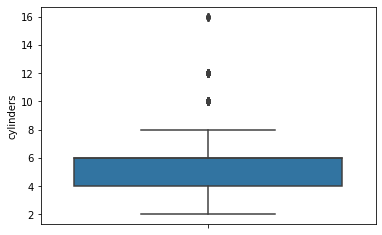

In [13]:
# Before clipping
sns.boxplot( y = 'cylinders', data = df)
plt.show()

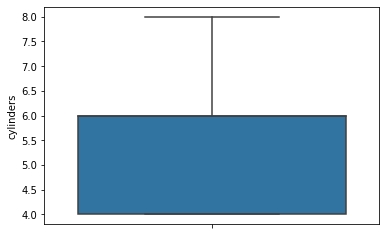

In [14]:
# After clipping series
df['cylinders'].clip(lower = df.cylinders.quantile(0.1), \
                     upper = df['cylinders']. quantile(0.9),
                     inplace = True)

sns.boxplot( y = 'cylinders', data = df)
plt.show()

Question 6

Using a categorical column, replace any value that is not in the top 5 most frequent values
with 'Other'.

In [40]:
# Inspect categorical column
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv( url , encoding='utf_8_sig')

df1 = df.copy()
df1.drive.value_counts()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                3015
4-Wheel Drive                  1460
2-Wheel Drive                   507
Part-time 4-Wheel Drive         258
Name: drive, dtype: int64

In [55]:
# Extract top 5 values and use where 
top5 = df1.drive.value_counts()[:5]
print(top5.index)
df1['drive'] = df1['drive'].where(df1.drive.isin(top5.index),'Other')

print("\nResults after manipulation of the series is\n ")
print(df1['drive'].value_counts())

Index(['Front-Wheel Drive', 'Rear-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'All-Wheel Drive', 'Other'],
      dtype='object')

Results after manipulation of the series is
 
Front-Wheel Drive             14236
Rear-Wheel Drive              13831
4-Wheel or All-Wheel Drive     6648
Other                          3414
All-Wheel Drive                3015
Name: drive, dtype: int64


Question 7

Using a categorical column, replace any value that is not in the top 10 most frequent values
with 'Other'.

In [54]:
df2 = df.copy()
top10 = df2.model.value_counts()[:10]
print(top10.index)
df2['model'] = df2['model'].where(df2.model.isin(top10.index),'Other')

print("\nResults after manipulation of the series is\n ")
print(df2['model'].value_counts())

Index(['F150 Pickup 2WD', 'F150 Pickup 4WD', 'Mustang', 'Jetta', 'Truck 2WD',
       'Camaro', 'Ranger Pickup 2WD', 'Accord', 'Civic', 'Sierra 1500 4WD'],
      dtype='object')

Results after manipulation of the series is
 
Other                39348
F150 Pickup 2WD        220
F150 Pickup 4WD        198
Mustang                192
Jetta                  190
Truck 2WD              187
Camaro                 182
Ranger Pickup 2WD      169
Accord                 157
Civic                  152
Sierra 1500 4WD        149
Name: model, dtype: int64


Question 8

Make a function that takes a categorical series and a number (n) and returns a replace series
that replaces any value that is not in the top n most frequent values with 'Other'.


In [60]:
def replace_series(my_series, n):
  """
  this function retruns a new series with values not in the top n most frequent values replaced with 'Other'
  while keeping top n most frequent values

  n = Top n frequent values
  my_series = user supplied series

  """
  import pandas as pd
  topN = my_series.value_counts()[:n]
  
  return my_series.where(my_series.isin(topN.index), 'Other')


if __name__ == '__main__':
  print("Before manipulation\n")
  print(df.make.value_counts())
  print("\n After manipulation\n")
  print(replace_series(df.make, 8).value_counts())


before manipulation

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

 After manipulation

Other            21647
Chevrolet         4003
Ford              3371
Dodge             2583
GMC               2494
Toyota            2071
BMW               1966
Mercedes-Benz     1538
Nissan            1471
Name: make, dtype: int64


Question 9

 Using a numeric column, bin it into 10 groups that have the same width.

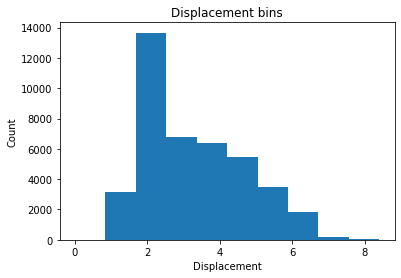

In [73]:
# Lets visualize numeric column
plt.hist(df2.displ)
plt.xlabel('Displacement')
plt.ylabel('Count')
plt.title('Displacement bins')
plt.show()

In [79]:
# Create 10 bins of equal width
displacement = df.displ
df.binned= pd.cut(x = displacement , bins = 10 , include_lowest= True)
df.binned

0        (1.68, 2.52]
1         (4.2, 5.04]
2        (1.68, 2.52]
3        (5.04, 5.88]
4        (1.68, 2.52]
             ...     
41139    (1.68, 2.52]
41140    (1.68, 2.52]
41141    (1.68, 2.52]
41142    (1.68, 2.52]
41143    (1.68, 2.52]
Name: displ, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(-0.009399999999999999, 0.84] < (0.84, 1.68] < (1.68, 2.52] <
                                            (2.52, 3.36] ... (5.04, 5.88] < (5.88, 6.72] <
                                            (6.72, 7.56] < (7.56, 8.4]]

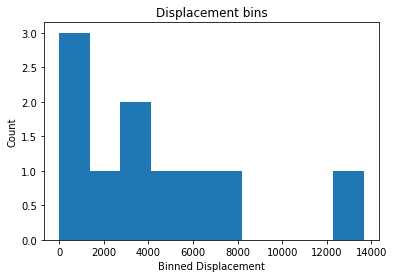

In [82]:
# Lets visualize numeric column
plt.hist(df.binned.value_counts())
plt.xlabel('Binned Displacement')
plt.ylabel('Count')
plt.title('Displacement bins')
plt.show()

Question 10

Using a numeric column, bin it into 10 groups that have equal sized bins.

In [84]:
# Create 10 groups that have equal sized bins 

df['qbinned'] = pd.qcut(x = df.displ , q = 10)
df.qbinned

0        (1.8, 2.0]
1        (4.6, 5.3]
2        (2.0, 2.4]
3        (4.6, 5.3]
4        (2.0, 2.4]
            ...    
41139    (2.0, 2.4]
41140    (2.0, 2.4]
41141    (2.0, 2.4]
41142    (2.0, 2.4]
41143    (2.0, 2.4]
Name: qbinned, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 1.8] < (1.8, 2.0] < (2.0, 2.4] < (2.4, 2.5] < ... <
                                            (3.5, 3.9] < (3.9, 4.6] < (4.6, 5.3] < (5.3, 8.4]]

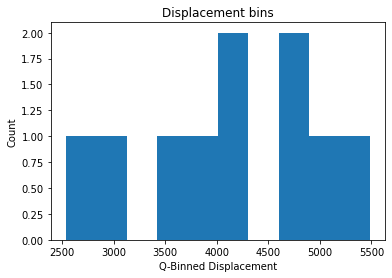

In [85]:
# Lets visualize numeric column
plt.hist(df.qbinned.value_counts())
plt.xlabel('Q-Binned Displacement')
plt.ylabel('Count')
plt.title('Displacement bins')
plt.show()